## Import all neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the data 

In [2]:
df = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')


### Inspecting the Observation Dataframe

In [3]:
df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


The Observations dataset consists of Three(3) columns 
- **scientific_name** Which contains the scientiific name of the animals
- **park_name** Contains names of all the National Parks 
- **observations**  the number of times each specie was seen during the period the data was collected

From the information from `df.info()` above its safe  to say there are no missing values 

### Inspecting the Species Dataframe

In [5]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The Species Dataset contains Four(4) columns
- **category** Which contains different types of species of living things
- **scientific_name** Which contains the scientiific name of the species
- **common_names** Which contain local names for each species, also "English names".
- **conservation_status** The species conservation status 


In [6]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [7]:
non_empty_rows = species[species['conservation_status'].notna()]
non_empty_rows.head()

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern


From our `species.info()` code we see that 3 of the column fields are complete and the `conservation_status` column has only 191 occupied fields out of 5824, with the `non_empty_rows` call i was able to deduce that the fields with "missing data" aren't in fact missing, It shows that the species without a conservation_status are not in danger and do not need to be conserved 

### Exploring the data

The Species data has drawn the first piece of concern so let's go deeper to see more of what it actually holds

In [8]:
print(f"There are {species.category.nunique()} different species of Living things in this table")
print(f"And they are {species.category.unique()}")

There are 7 different species of Living things in this table
And they are ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [9]:
species_count = species.category.value_counts()
print(species_count)

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64


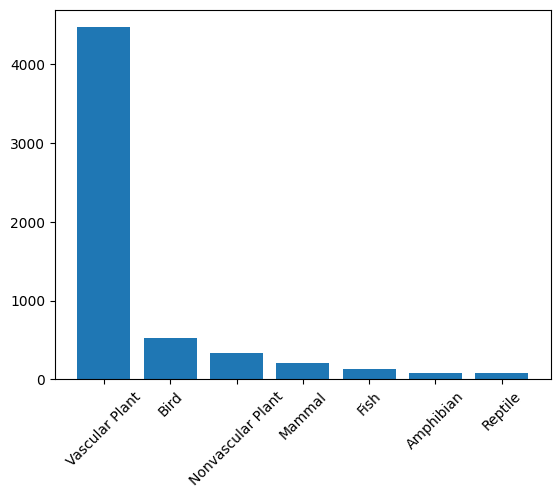

In [10]:
plt.bar(species_count.index, species_count.values)
plt.xticks(rotation=45)
plt.show()

From the observation in the Bar Chart above we can see that `Vascular plants` are the most represented in this dataset with 4470 

Now over to the conservation status column, let's find out how many different levels of conservation are available

In [11]:
species.conservation_status.value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

As we see there are four levels of conservation : `Species of Concern, Endangered, Threatened `and `In Recovery`

I guess that's about it for Exploring the `Species` data for now, we will be back for more analysis but first let's see what the `Observations` dataset contains

In [12]:
df.park_name.value_counts()

park_name
Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: count, dtype: int64

There are Four different parks which observations were made from and each park contains sightings of 5824 species each  

In [13]:
df.observations.sum()

3314739

There's been `3,314,739` Total Sightings across the 4 National Parks in our Dataset